<a href="https://colab.research.google.com/github/treezy254/Cause-of-Deaths-in-the-United-States/blob/master/Cause_of_Deaths_in_the_United_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
What is the total number of records in the dataset?

• What were the causes of death in this data set? ---+

• What was the total number of deaths in the United 
States from 1999 to 2017? ---+

• What is the number of deaths per each year from 1999 
to 2017? ---+

• Which ten states had the highest number of deaths 
overall? ---+

• What were the top causes of deaths in the United States 
during this period? ---+

'''


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('NCHS.csv', index_col=0)
data.head()

,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
Year,,,,,
2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,"169,936",49.4
2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,"2,703",53.8
2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,"4,184",56.2
2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,"1,625",51.8


In [9]:
data.describe()

,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
count,10868,10868,10868,10868,10868
unique,11,11,52,5964,2490
top,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,343,19.2
freq,988,988,209,15,40


In [23]:
data.isnull().any()

113 Cause Name             False
Cause Name                 False
State                      False
Deaths                     False
Age-adjusted Death Rate    False
dtype: bool

In [10]:
data.shape

(10868, 5)

In [89]:
causes = data['Cause Name'].unique()
causes

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Stroke', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Suicide', 'Cancer', 'Kidney disease'],
      dtype=object)

In [90]:
data = data[data["Cause Name"] != "All causes"]
causes = data['Cause Name'].unique()
causes

array(['Unintentional injuries', "Alzheimer's disease", 'Stroke', 'CLRD',
       'Diabetes', 'Heart disease', 'Influenza and pneumonia', 'Suicide',
       'Cancer', 'Kidney disease'], dtype=object)

In [91]:
len(causes)

10

In [116]:
# data.sort_values(by=['Cause Name']).head(5)
causer = data.groupby('Cause Name').sum()
causer.sort_values('Deaths', ascending=False, inplace=True)
causer.head(10)

,Deaths
Cause Name,
Heart disease,12222640
Cancer,10843644
Stroke,2726523
CLRD,2594927
Unintentional injuries,2347820
Alzheimer's disease,1494816
Diabetes,1399943
Influenza and pneumonia,1094641
Kidney disease,858613


<AxesSubplot:title={'center':'Top ten causes of death in USA \n 1999- 2017'}, xlabel='Cause Name'>

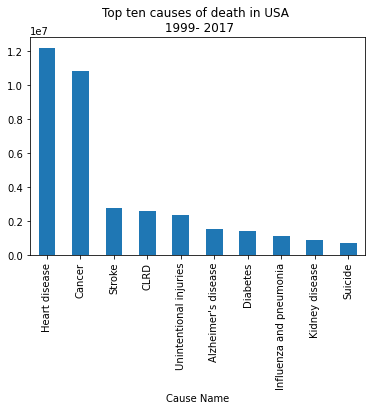

In [118]:
causer['Deaths'].head(10).plot.bar(title='Top ten causes of death in USA \n 1999- 2017')

In [71]:
death_data = pd.read_csv('NCHS.csv', index_col=0)
death_data['Deaths'] = death_data['Deaths'].str.replace(',', '')
death_data['Deaths'] = death_data['Deaths'].astype(int)
death_data['Deaths'].sum()

168018304

In [72]:
state = data["State"].unique()
state

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [73]:
data = data[data['State'] != 'United States']
states = data['State'].unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [74]:
len(states)

51

In [112]:
top = data.groupby('State').sum()
top.sort_values("Deaths", ascending=False, inplace=True)
top.head(10)

,Deaths
State,
California,3594261
Florida,2533472
Texas,2367695
New York,2264120
Pennsylvania,1854953
Ohio,1605250
Illinois,1508039
Michigan,1313813
North Carolina,1115953


<AxesSubplot:title={'center':'Top ten states with the highest number of deaths \n 1999 - 2017'}, xlabel='State'>

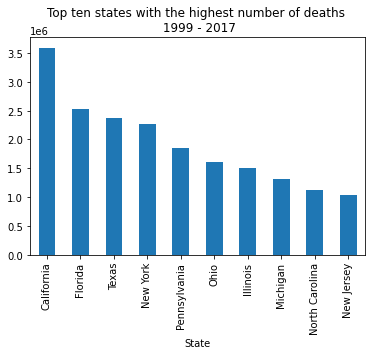

In [113]:
top['Deaths'].head(10).plot.bar(title = 'Top ten states with the highest number of deaths \n 1999 - 2017')

In [103]:
years = data.groupby('Year')['Deaths'].sum()
years

Year
1999    1905826
2000    1902194
2001    1899358
2002    1918873
2003    1912115
2004    1864133
2005    1889981
2006    1854676
2007    1846301
2008    1872981
2009    1838501
2010    1852349
2011    1869321
2012    1876588
2013    1910311
2014    1938408
2015    2013017
2016    2034119
2017    2081531
Name: Deaths, dtype: int64

<AxesSubplot:title={'center':'Death per year \n 1999-2015'}, xlabel='Year'>

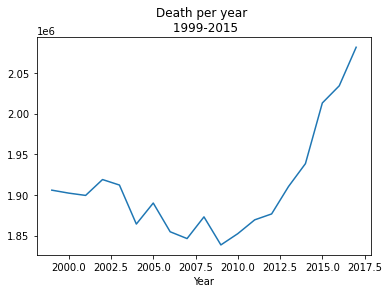

In [104]:
dyear = data.groupby('Year').sum()
dyear['Deaths'].plot(title='Death per year \n 1999-2015')